<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [34]:
# librerias

import pandas as pd
import numpy as np
import seaborn as sns

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem
import scipy.stats as stats
import statsmodels.stats.api as sms
import pylab as plt

In [61]:
import warnings
warnings.simplefilter('ignore')


import numpy as np
import pylab as plt
plt.rcParams['figure.figsize']=(15, 8)

from scipy.stats import bernoulli, beta   

In [10]:
# datos
df = pd.read_csv('data/cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


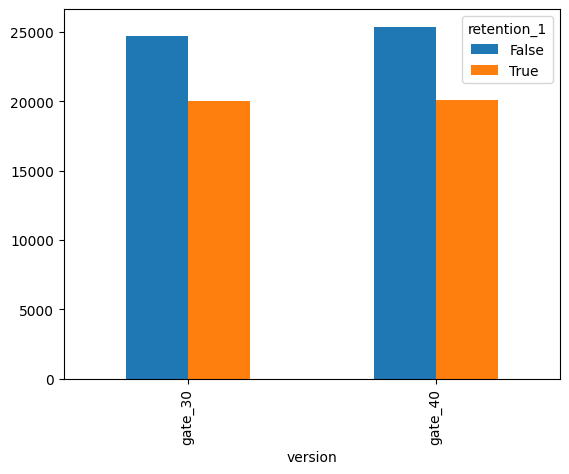

In [22]:
cross = pd.crosstab(df.version, df.retention_1).plot(kind='bar');

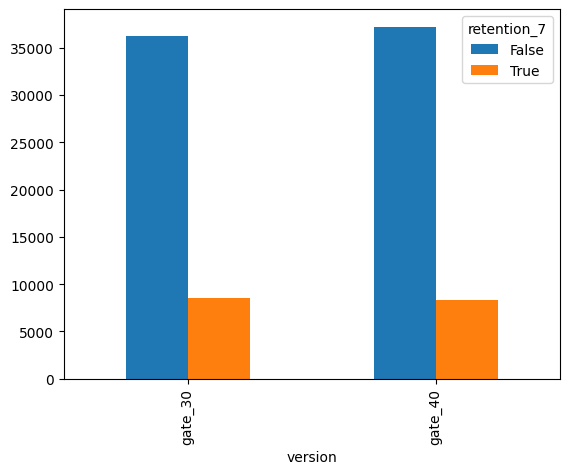

In [23]:
cross = pd.crosstab(df.version, df.retention_7).plot(kind='bar');

In [40]:
control = df[df['version']== 'gate_30']
tratamiento = df[df['version'] == 'gate_40']
ab_test=pd.concat([control, tratamiento], axis=0)
ab_test.reset_index(drop=True, inplace=True)
ab_test.tail()


,userid,version,sum_gamerounds,retention_1,retention_7
90184,9998733,gate_40,10,True,False
90185,9999441,gate_40,97,True,False
90186,9999479,gate_40,30,False,False
90187,9999768,gate_40,51,True,False
90188,9999861,gate_40,16,False,False


In [42]:
ab_test.version.value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

In [43]:
tasas_conversion = ab_test.groupby('version')['retention_1']    # agrupacion por grupo


std = lambda x: np.std(x, ddof=0)              # std
error_std= lambda x: stats.sem(x, ddof=0)      # sem = std/sqrt(n)

tasas_conversion = tasas_conversion.agg([np.mean, std, error_std])

tasas_conversion.columns = ['conversion_rate', 'std', 'sem']

tasas_conversion.style.format('{:.3f}')

,conversion_rate,std,sem
version,,,
gate_30,0.448,0.497,0.002
gate_40,0.442,0.497,0.002


In [59]:
control_res=ab_test[ab_test.version=='gate_30']['retention_1']
control_res.value_counts()

False    24666
True     20034
Name: retention_1, dtype: int64

In [58]:
trat_res=ab_test[ab_test.version=='gate_40']['retention_1']
trat_res.value_counts()

False    25370
True     20119
Name: retention_1, dtype: int64

In [50]:
observaciones=[44700, 45489]  # count
conversiones=[control_res.sum(), trat_res.sum()]
z_score, p_value = proportions_ztest(conversiones, nobs=observaciones)
(control_a, trata_a), (control_b, trata_b) = proportion_confint(conversiones, 
                                                                nobs=observaciones,
                                                                alpha=0.05)


In [51]:
print(f'z-score: {z_score:.2f}')

print(f'p-valor: {p_value:.3f}')

print(f'intervalo conf 95% para grupo control: [{control_a:.3f}, {control_b:.3f}]')

print(f'intervalo conf 95% para grupo tratamiento: [{trata_a:.3f}, {trata_b:.3f}]')

z-score: 1.78
p-valor: 0.074
intervalo conf 95% para grupo control: [0.444, 0.453]
intervalo conf 95% para grupo tratamiento: [0.438, 0.447]


In [52]:
# testeo para retention_7
tasas_conversion = ab_test.groupby('version')['retention_7']    # agrupacion por grupo


std = lambda x: np.std(x, ddof=0)              # std
error_std= lambda x: stats.sem(x, ddof=0)      # sem = std/sqrt(n)

tasas_conversion = tasas_conversion.agg([np.mean, std, error_std])

tasas_conversion.columns = ['conversion_rate', 'std', 'sem']

tasas_conversion.style.format('{:.3f}')




,conversion_rate,std,sem
version,,,
gate_30,0.190,0.392,0.002
gate_40,0.182,0.386,0.002


In [54]:
control_res=ab_test[ab_test.version=='gate_30']['retention_7']
control_res.head()

0    False
1    False
2    False
3    False
4    False
Name: retention_7, dtype: bool

In [55]:
trat_res=ab_test[ab_test.version=='gate_40']['retention_7']
trat_res.head()

44700    False
44701    False
44702     True
44703     True
44704    False
Name: retention_7, dtype: bool

In [56]:
observaciones=[44700, 45489]  # count
conversiones=[control_res.sum(), trat_res.sum()]
z_score, p_value = proportions_ztest(conversiones, nobs=observaciones)
(control_a, trata_a), (control_b, trata_b) = proportion_confint(conversiones, 
                                                                nobs=observaciones,
                                                                alpha=0.05)

In [57]:
print(f'z-score: {z_score:.2f}')

print(f'p-valor: {p_value:.3f}')

print(f'intervalo conf 95% para grupo control: [{control_a:.3f}, {control_b:.3f}]')

print(f'intervalo conf 95% para grupo tratamiento: [{trata_a:.3f}, {trata_b:.3f}]')

z-score: 3.16
p-valor: 0.002
intervalo conf 95% para grupo control: [0.187, 0.194]
intervalo conf 95% para grupo tratamiento: [0.178, 0.186]


# conclusiones
# Explica detalladamente las conclusiones obtenidas de. tu testeo.
Para el caso de un 1 dia rechazamos H0 es decir no hace falta hacer ningun cambio en el video juego 
con respecto a colocar la puerta en el nivel 40 
en cambio para el caso de 7 dias si hay una diferencia significativa que hay mas personas 
que siguen jugando despues de los 7 dias colocando la puerta a nivel 40
## 'YO cambaria el juego  ya que retengo a mas jugadores en el tiempo colocando la puerta de espera a nivel 40 '

# Bayes

In [60]:
# los datos son conocidos : impresiones y conversiones para test y control

imps_ctrl, convs_ctrl = 44700, 20034    # entrar, seguir jugando

imps_test, convs_test = 45489, 20119 


CR_ctrl = convs_ctrl/imps_ctrl
CR_test = convs_test/imps_test

f'Tasas conversion: Control: {CR_ctrl}, Test: {CR_test}'

'Tasas conversion: Control: 0.4481879194630872, Test: 0.44228274967574577'

In [62]:
a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1   # aciertos, fallos
a_T, b_T = convs_test+1, imps_test-convs_test+1


beta_control = beta(a_C, b_C)
beta_test = beta(a_T, b_T)

In [63]:
beta_control.mean(), beta_test.mean()

(0.44819023757326293, 0.44228528719966587)

In [87]:
x=np.linspace(0.38,0.5, 1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

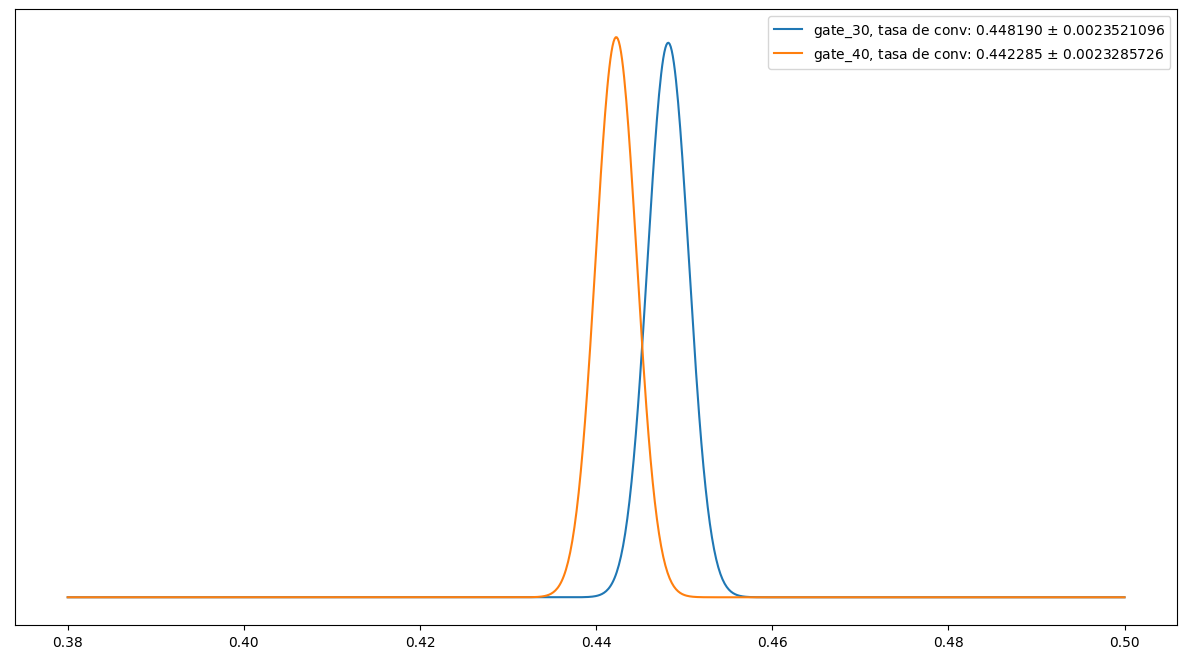

In [88]:
plot([beta_control, beta_test], ['gate_30', 'gate_40'])

In [89]:
salto = (beta_test.mean() - beta_control.mean())/beta_control.mean()

salto

-0.013175098158249857

In [90]:
prob = 1 - beta_test.cdf(0.445)

prob

0.12187063831633993

In [91]:
'''El test aumenta la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto*100, prob*100)

'El test aumenta la tasa de conversion en un -1.32%, con una probabilidad del 12.19%'